In [1]:
#Kütüphaneler
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle
from pandas import DataFrame

from scipy import stats
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler

from pandas import concat
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.utils import _determine_key_type

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
"""****************************************************************************************************************************************
@brief       : Verilen verisetlerinin birleştirilmesini sağlayan fonksiyondur.
               Burada 3 adet verisetinin birleştirilmesi gösterilmiştir.
@input   df1 : Veri setinde  en başa gelecek veri setinin adı.
@input   df2 : df1'in yanına eklenecek olan veri seti
@input   df3 : df2'nin yanına eklenecek olan veri setinin adı.
@output  add : Birleştirilen veri seti.
"""

def merge_dfs(df1,df2,df3):
    add = df1.merge(df2,how="left").merge(df3, how="left")
    return add
"""****************************************************************************************************************************************
@brief         : Veri setindeki eksik verilerin sütununun ve sayısının gösterildiği fonksiyondur.
@input   df    : Eksik verileri incelenecek olan veri setinin adı.
@output  eksik : Eksik veriler.
"""

def eksik_veriler(df):
    eksik = df.isna().sum()
    return eksik
"""****************************************************************************************************************************************
@brief                    : Tarih sütunu bilgisine ek olarak diğer bilgilerin ayrışması ve eklenmesi
@input   df               : Tarih bilgilerii ayrılacak olan veri setinin adı.
@output  df['Year']       : Tarih bilgisindeki yıl 
@output  df['Month']      : Tarih bilgisindeki ay
@output  df['Day']        : Tarih bilgisindeki gün
@output  df['WeekOfYear'] : Tarih bilgisindeki yılın hangi haftası bilgisi
"""

def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    #df['WeekOfYear'] = (df.Date.dt.isocalendar().week)

"""****************************************************************************************************************************************
@brief         : Kategorik veriden nümerik veriye çevirme işlemi. 
@input   df    : Veri setinin adı.
@input   col   : İlgili sütun adı.
@output  dummy : Nümerik veriye çevrilmiş hali.
"""


def dummies(df,col):
    dummy = pd.get_dummies(df, columns = [col])
    return dummy
"""****************************************************************************************************************************************
@brief         : Veri setinde bulunan NaN değerlerini sıfıra çeviren fonksiyondur. 
@input   df    : Veri setinin adı.
@input   col   : İlgili sütun adı.
"""

def fillnazero(df,col):
    df[[col]] = df[[col]].fillna(0)
    return
"""****************************************************************************************************************************************
@brief         : Veri setinde bulunan ilgili sütunu düşürme fonksiyonudur. 
@input   df    : Veri setinin adı.
@input   col   : İlgili sütun adı.
@outpt   df1   : Sütunu düşürülmüş dataframe.
"""

def drop_col(df,col):
    df1 = df.drop(columns=[col])
    return df1

"""****************************************************************************************************************************************
@brief            : Veri setinde bulunan tarih kısmını istediğimiz yerden ileri ve geri şekilde bölne fonksiyondur. 
@input   df       : Veri setinin adı.
@input   col      : İlgili sütun adı.
@input   date     : Tarih bilgisi.
@input   select   : İleri zaman ya da geri zaman olarak belirlenen bu kesim işleminde, ileri tarihli bir zaman yazılacaksa 
                    İleri yazılırken, geri zamanlı bir tarih için herhangi bir şey yazılabilir.
@output  ileri    : Verilen tarihin sonrasını getirir.
@output  geri     : Verilen tarihin gerisini getirir.
"""


def split(df,col,date,select):
    geri = df.loc[df[col]<date]
    ileri = df.loc[df[col]>=date]
    if select == "ileri":
        return ileri
    else:
        return geri 
"""****************************************************************************************************************************************
@brief              : Test ve train verisetlerini oluştururken kullanılan veri setini ve kullanılacak olan 
                      satırları çağıran fonksiyondur.
@input   df         : Veri setinin adı.
@input   col_list   : Test veya train için kullanılacak olan sütunların listesi.
@output  df_train   : oluşturulan dataframe.
"""


def create(df,col_list):
    df_train = df[col_list]
    return df_train
"""****************************************************************************************************************************************
@brief            : XGBoost algoritması kullanılarak modelin eğitilmesi ve eğitim sonucu çıkan tahmin değeri olan
                    y_pred değeri için hazırlanmış olan fonksiyondur.
@input   tX       : Train edilecek olan X değerleri.
@input   tY       : Train edilecek olan y değerleri.
@input   testX    : Test edilecek olan  X değerleri
@output  y_pred   : Eğitim sonucu oluşturulan tahmin.
"""

def XGB(tX,tY,testX):
    model = XGBRegressor(random_state = 1)
    model = model.fit(tX,tY)
    y_pred = model.predict(testX)
    return y_pred
"""****************************************************************************************************************************************
@brief               : Hata tahminlerinin hesaplanmasını sağlayan fonksiyondur.
@input   testy       : Olması gereken sonuç değerleri.
@input   yhat        : Tahmin edilen sonuç değerleri.
@output  mae_model   : Ortalama Mutlak Hata
@output  mse_model   : Ortalama Kare Hata 
@output  rmse_model  : Kök Ortalama Kare Hata 
"""


def errors(testy,yhat):
    mae_model = mean_absolute_error(testy,yhat)
    mse_model = mean_squared_error(testy,yhat)
    rmse_model = np.sqrt(mse_model)
    
    return print("mae:", mae_model  ,"\nmse:", mse_model, "\nrmse:",rmse_model)
    

"""****************************************************************************************************************************************
@brief              : r2 değerini hesaplayan fonksiyondur.
@input   testyvalue : Olması gereken y değerleri.
@input   yhat       : Tahmin edilen olan y değerleri.
@output  r2_value   : r2 oranı.
"""

def r2(testyvalues, yhat):
    r2_value = r2_score(testyvalues,yhat)
    return r2_value

"""****************************************************************************************************************************************
    @brief            : scatter plot çizdirmek için kullanılan fonksiyondur.
    @input   x        : x ekseni
    @input   y        : y ekseni
    @input   figsizea : çerçeve büyüklüğünün x değeri 
    @input   figsizeb : çerçeve büyüklüğünün y değeri
    @input   xlabel   : x ekseninin adı
    @input   xlabel   : y ekseninin adı
    @input   axis     :
"""


def plot_scatter(x,y,figsizea,figsizeb,xlabel,ylabel,axis):

    plt.figure(figsize=(figsizea,figsizeb))
    plt.scatter(x,y, color="green")
    plt.plot(x,x,color="black")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.axis(axis)

"""**********************************************************************************************************************************************
    @brief            : line plot çizdirmek için kullanılan fonksiyondur.
    @input   figsizex : çerçeve büyüklüğünün x değeri 
    @input   figsizey : çerçeve büyüklüğünün y değeri
    @input   lx       : x ekseni
    @input   ly       : y ekseni
    @input   ci       : gölgelendirme olsun mu (None=olmasın) - default olarak vardır.
    @input   color    : grafiğin rengi
    @input   label    : grafiğin adı

"""


def plot_line(figsizex,figsizey,lx,ly,ci,color,label):
    sns.set()
    y, ax = plt.subplots(figsize=(figsizex,figsizey))
    sns.lineplot(x=lx,y=ly,ci=ci,color=color,label=label)


"""*****************************************************************************************************************************************
    @brief            : 2 line plotu üst üste çizdirmek için kullanılan fonksiyondur.
    @input   figsizea : çerçeve büyüklüğünün x değeri 
    @input   figsizeb : çerçeve büyüklüğünün y değeri
    @input   x1       : 1. grafiğib x ekseni
    @input   y1       : 1. grafiğin y ekseni
    @input   x2       : 2. grafiğin x ekseni
    @input   y2       : 2. grafiğin y ekseni
    @input   ci       : gölgelendirme olsun mu (None=olmasın) - default olarak vardır.
    @input   color1   : 1. grafiğin rengi
    @input   color2   : 2. grafiğin rengi
    @input   label1   : 1. grafiğin adı
    @input   label2   : 2. grafiğin adı
"""


def plotline_con(figsizex,figsizey,x1,y1,x2,y2,ci,color1,color2,label1,label2):
    sns.set()
    y, ax = plt.subplots(figsize=(figsizex,figsizey))
    sns.lineplot(x=x1,y=y1,ci=ci,color=color1,label=label1)
    sns.lineplot(x=x2,y=y2,ci=ci,color=color2,label=label2)

#****************************************************************************************************************************************
"""
    @brief              : Tarih verisini shiftlemek için kullanılan fonksiyondur.
    @input   listshift  : Shiftlenecek sütun bilgilerinin listesi 
    @input   shifted    : Shift edilmiş liste 
    @input   lagnumber  : Shift edilecek gün sayısı
    @output  shifted_df : Shift edilmiş verilerin dataframe hali.

"""

def shift(listshift,shifted,df,lagnumber):
    for i in listshift:
        shifted.append(df[i].shift(lagnumber))
    shifted_df = (pd.DataFrame(shifted)).transpose()
    return shifted_df

#****************************************************************************************************************************************
"""
    @brief           : Birleştirilecek dataframeler için oluşturulmuş bir fonksiyondur.
    @input   df      : 1. dataframe 
    @input   df2     : 2. dataframe 
    @input   join    : 
    @input   axis    : Dataframe'in eklenecek kısmını ifade eder. 0 = aşağı, 1 = soluna.
    @output  df_conc : Birleştirilmiş dataframelerin son hali.

"""

def concat(df,df2,join,axis):
    df_conc = pd.concat([df,df2], join=join, axis=axis)
    return df_conc


#****************************************************************************************************************************************
"""
    @brief                      : Test ve train verilerini normalize etmeye sağlayan fonksiyondur.
    @input   train_data         : train verisi
    @input   test_data          : test verisi
    @output  normtrain_data     : normalize edilmiş train verisi
    @output  normtest_data      : normalize edilmiş test verisi

"""



def normalizedata(train_data,test_data):
    scaler = preprocessing.MinMaxScaler()
    normtrain_data = scaler.fit_transform(train_data)
    normtest_data = scaler.transform(test_data)
    return normtrain_data, normtest_data, scaler 

#****************************************************************************************************************************************




### Veri setleri içe aktarılıyor.


In [3]:
features_df   = pd.read_csv("C:/deneme/walmart/data/features.csv")
stores_df     = pd.read_csv("C:/deneme/walmart/data/stores.csv")
train_df      = pd.read_csv("C:/deneme//walmart/data/train.csv")

### Train veri setinin incelenmesi


In [4]:
train_df.shape

(421570, 5)

In [5]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


### Stores veri setinin incelenmesi


In [7]:
stores_df.shape

(45, 3)

In [8]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [9]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


### Features veri setinin incelenmesi

In [10]:
features_df.shape

(8190, 12)

In [11]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [12]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


### Veri setlerinin birleştirilmesi


In [13]:
dataset = train_df.merge(stores_df, how="left").merge(features_df, how="left")

In [14]:
dataset

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


In [15]:
missing_values = dataset.isnull().sum()

Text(0.5, 0, 'Variable')

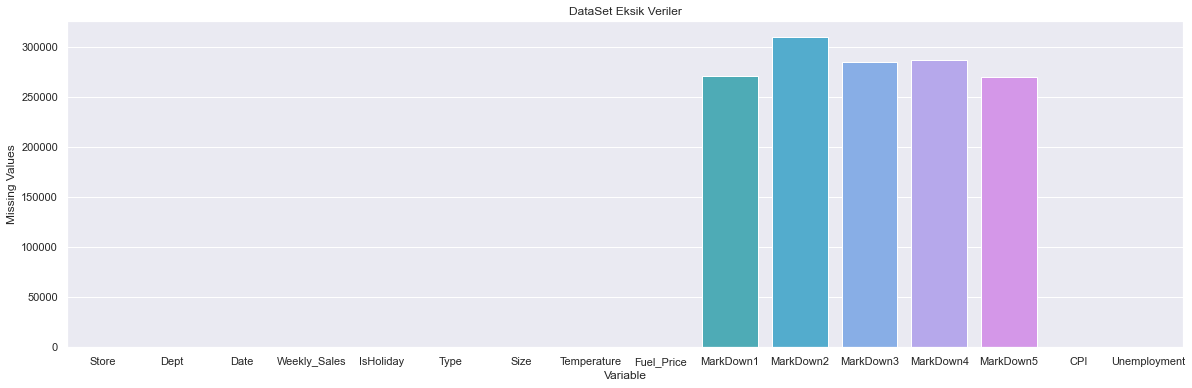

In [16]:
sns.set()
f, ax = plt.subplots(figsize=(20,6))
sns.barplot(x=missing_values.index, y=missing_values.values,)
plt.title("DataSet Eksik Veriler")
plt.ylabel("Missing Values")
plt.xlabel("Variable")

### Veri setindeki eksik verilerin doldurulması

In [17]:
for i in range(1,6):
    dataset["MarkDown"+str(i)] = dataset["MarkDown"+str(i)].fillna(value = dataset["MarkDown"+str(i)].mean())

In [18]:
dataset.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

### Tarih verilerinin ayrılması

In [19]:
split_date(dataset)

In [20]:
dataset

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,2010,2,5
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.242170,8.106,2010,2,12
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.289143,8.106,2010,2,19
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.319643,8.106,2010,2,26
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.350143,8.106,2010,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.610000,20.640000,1.500000,1601.010000,3288.250000,192.013558,8.684,2012,9,28
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.740000,3334.628621,18.820000,2253.430000,2340.010000,192.170412,8.667,2012,10,5
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.280000,3334.628621,7.890000,599.320000,3990.540000,192.327265,8.667,2012,10,12
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.020000,3334.628621,3.180000,437.730000,1537.490000,192.330854,8.667,2012,10,19


### Outlier tespiti ve anormaliler

In [21]:
dataset['Total_MarkDown'] = dataset['MarkDown1']+dataset['MarkDown2']+dataset['MarkDown3']+dataset['MarkDown4']+dataset['MarkDown5']

In [22]:
dataset

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,Total_MarkDown
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,2010,2,5,20032.613536
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.242170,8.106,2010,2,12,20032.613536
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.289143,8.106,2010,2,19,20032.613536
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.319643,8.106,2010,2,26,20032.613536
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.350143,8.106,2010,3,5,20032.613536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.610000,20.640000,1.500000,1601.010000,3288.250000,192.013558,8.684,2012,9,28,9468.010000
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.740000,3334.628621,18.820000,2253.430000,2340.010000,192.170412,8.667,2012,10,5,12993.628621
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.280000,3334.628621,7.890000,599.320000,3990.540000,192.327265,8.667,2012,10,12,9888.658621
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.020000,3334.628621,3.180000,437.730000,1537.490000,192.330854,8.667,2012,10,19,7317.048621


In [23]:
dataset.shape

(421570, 20)

In [24]:
data = dataset

In [25]:
# Veri setimizin indeksini tarih olarak ayarlıyoruz.
data = data.set_index(data["Date"])
#İndexte bulunan isimi kaldırıyoruz.
data = data.rename_axis(None)
#Veri setinde halen bulunmakta olan "Date" sütununu çıkarıyoruz.
data.pop("Date")

2010-02-05   2010-02-05
2010-02-12   2010-02-12
2010-02-19   2010-02-19
2010-02-26   2010-02-26
2010-03-05   2010-03-05
                ...    
2012-09-28   2012-09-28
2012-10-05   2012-10-05
2012-10-12   2012-10-12
2012-10-19   2012-10-19
2012-10-26   2012-10-26
Name: Date, Length: 421570, dtype: datetime64[ns]

In [26]:
data

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,Total_MarkDown
2010-02-05,1,1,24924.50,False,A,151315,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,2010,2,5,20032.613536
2010-02-12,1,1,46039.49,True,A,151315,38.51,2.548,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.242170,8.106,2010,2,12,20032.613536
2010-02-19,1,1,41595.55,False,A,151315,39.93,2.514,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.289143,8.106,2010,2,19,20032.613536
2010-02-26,1,1,19403.54,False,A,151315,46.63,2.561,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.319643,8.106,2010,2,26,20032.613536
2010-03-05,1,1,21827.90,False,A,151315,46.50,2.625,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.350143,8.106,2010,3,5,20032.613536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,45,98,508.37,False,B,118221,64.88,3.997,4556.610000,20.640000,1.500000,1601.010000,3288.250000,192.013558,8.684,2012,9,28,9468.010000
2012-10-05,45,98,628.10,False,B,118221,64.89,3.985,5046.740000,3334.628621,18.820000,2253.430000,2340.010000,192.170412,8.667,2012,10,5,12993.628621
2012-10-12,45,98,1061.02,False,B,118221,54.47,4.000,1956.280000,3334.628621,7.890000,599.320000,3990.540000,192.327265,8.667,2012,10,12,9888.658621
2012-10-19,45,98,760.01,False,B,118221,56.47,3.969,2004.020000,3334.628621,3.180000,437.730000,1537.490000,192.330854,8.667,2012,10,19,7317.048621


### Negatif Weekly Sales


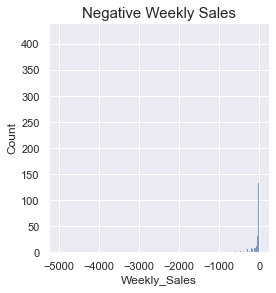

In [27]:
y = data["Weekly_Sales"][data.Weekly_Sales < 0]
sns.displot(y,height=4,aspect=1)
plt.title("Negative Weekly Sales", fontsize=15)
plt.show()

In [28]:
data=data[data['Weekly_Sales']>=0]

In [29]:
data.shape

(420285, 19)

In [30]:
data['IsHoliday'] = data['IsHoliday'].astype('int')


C:\Users\Busra\AppData\Local\Temp/ipykernel_11228/3873515775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['IsHoliday'] = data['IsHoliday'].astype('int')


In [31]:
data

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,Total_MarkDown
2010-02-05,1,1,24924.50,0,A,151315,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,2010,2,5,20032.613536
2010-02-12,1,1,46039.49,1,A,151315,38.51,2.548,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.242170,8.106,2010,2,12,20032.613536
2010-02-19,1,1,41595.55,0,A,151315,39.93,2.514,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.289143,8.106,2010,2,19,20032.613536
2010-02-26,1,1,19403.54,0,A,151315,46.63,2.561,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.319643,8.106,2010,2,26,20032.613536
2010-03-05,1,1,21827.90,0,A,151315,46.50,2.625,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.350143,8.106,2010,3,5,20032.613536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,45,98,508.37,0,B,118221,64.88,3.997,4556.610000,20.640000,1.500000,1601.010000,3288.250000,192.013558,8.684,2012,9,28,9468.010000
2012-10-05,45,98,628.10,0,B,118221,64.89,3.985,5046.740000,3334.628621,18.820000,2253.430000,2340.010000,192.170412,8.667,2012,10,5,12993.628621
2012-10-12,45,98,1061.02,0,B,118221,54.47,4.000,1956.280000,3334.628621,7.890000,599.320000,3990.540000,192.327265,8.667,2012,10,12,9888.658621
2012-10-19,45,98,760.01,0,B,118221,56.47,3.969,2004.020000,3334.628621,3.180000,437.730000,1537.490000,192.330854,8.667,2012,10,19,7317.048621


# Veri Görselleştirmeleri


### Aylara göre ortalama haftalık satışlar

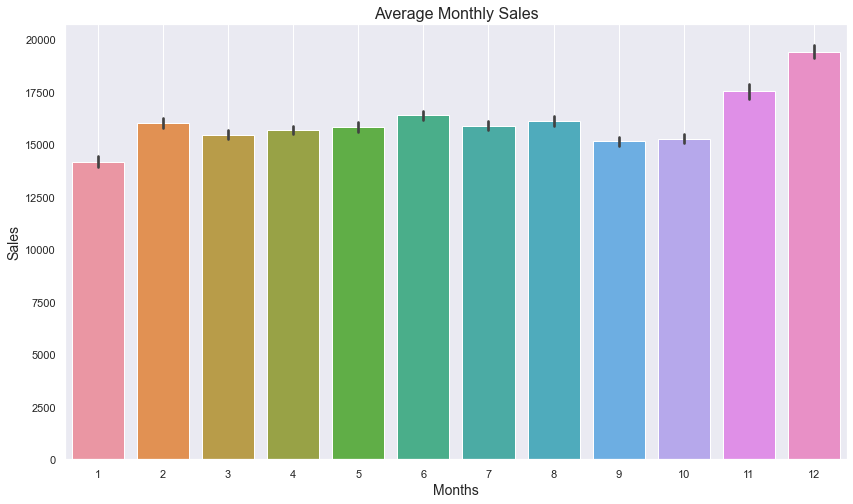

In [32]:
plt.figure(figsize=(14,8))
sns.barplot(x='Month',y='Weekly_Sales',data=data)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.title('Average Monthly Sales',fontsize=16)
plt.grid()

### Mağazalara göre ortalama haftalık satış


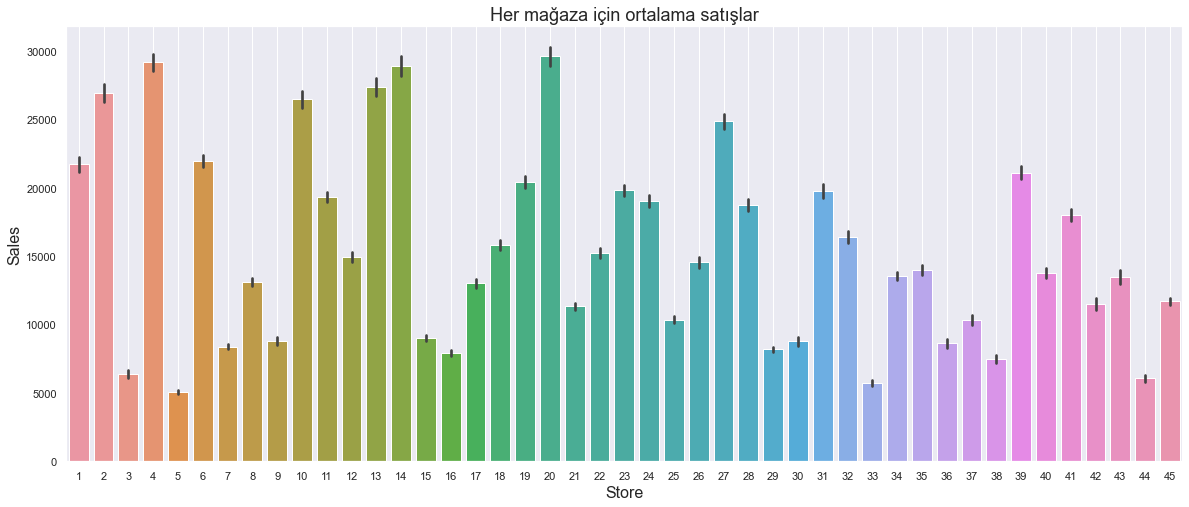

In [33]:
plt.figure(figsize=(20,8))
sns.barplot(x='Store',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Her mağaza için ortalama satışlar', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

### Departlamanlara göre ortalama haftalık satış


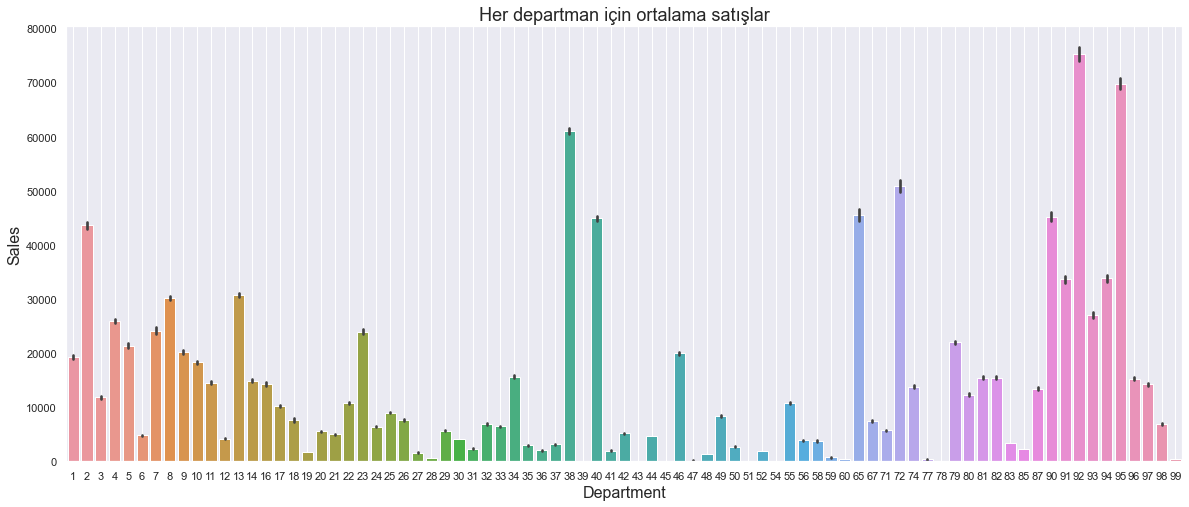

In [34]:
plt.figure(figsize=(20,8))
sns.barplot(x='Dept',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Her departman için ortalama satışlar', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Department', fontsize=16)
plt.show()

### Tatil Günlerinin incelenmesi


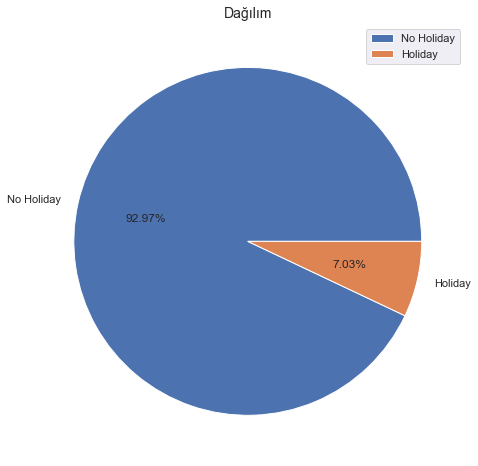

In [35]:
plt.figure(figsize=(8,8))
plt.pie(data['IsHoliday'].value_counts(),labels=['No Holiday','Holiday'],autopct='%0.2f%%')
plt.title("Dağılım",fontsize=14)
plt.legend()
plt.show()

<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

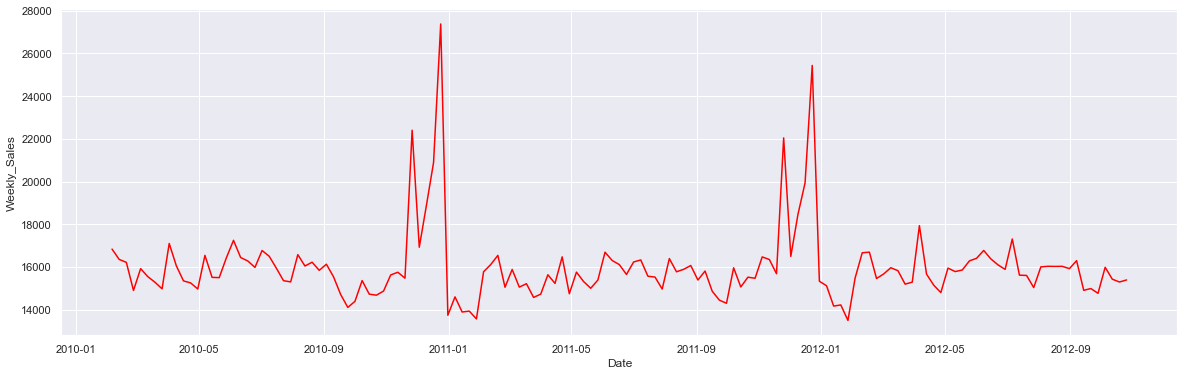

In [36]:
sns.set()
y, ax = plt.subplots(figsize=(20,6))
sns.lineplot(x=dataset["Date"], y=dataset["Weekly_Sales"], ci= None, color="red")


<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

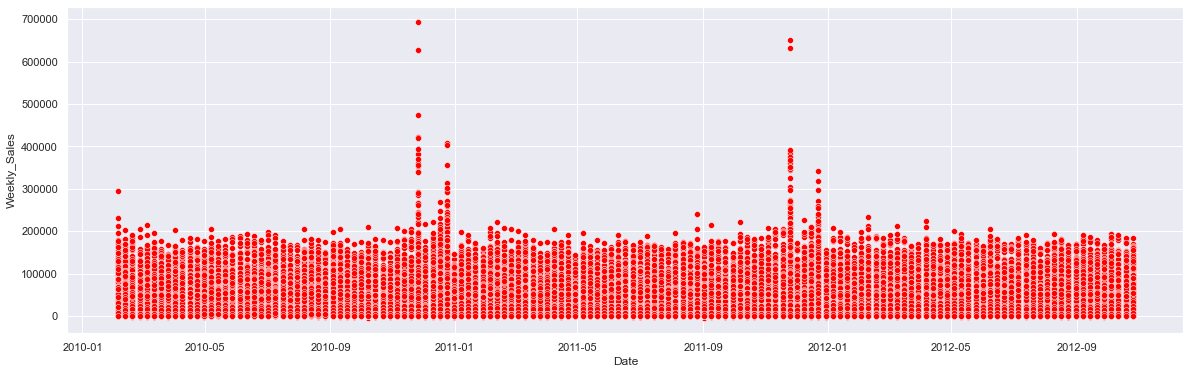

In [39]:
sns.set()
y, ax = plt.subplots(figsize=(20,6))
sns.scatterplot(x=dataset["Date"], y=dataset["Weekly_Sales"], color="red")


In [38]:
dataset

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,Total_MarkDown
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,2010,2,5,20032.613536
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.242170,8.106,2010,2,12,20032.613536
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.289143,8.106,2010,2,19,20032.613536
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.319643,8.106,2010,2,26,20032.613536
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.350143,8.106,2010,3,5,20032.613536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.610000,20.640000,1.500000,1601.010000,3288.250000,192.013558,8.684,2012,9,28,9468.010000
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.740000,3334.628621,18.820000,2253.430000,2340.010000,192.170412,8.667,2012,10,5,12993.628621
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.280000,3334.628621,7.890000,599.320000,3990.540000,192.327265,8.667,2012,10,12,9888.658621
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.020000,3334.628621,3.180000,437.730000,1537.490000,192.330854,8.667,2012,10,19,7317.048621


### Aylık satış verilerinin yıl bazında karşılaştırması

In [37]:
sales_years= dict()
for i in dataset["Year"].unique():
  sales_years[i] = dataset[(dataset.Year == i)].groupby('Month')['Weekly_Sales'].mean()


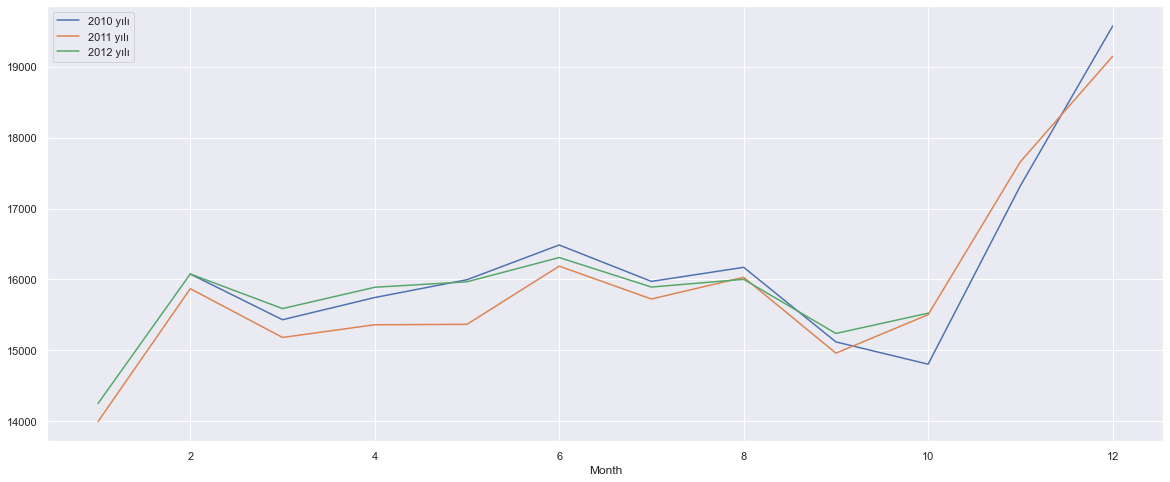

In [38]:
sns.set()
fig, ax = plt.subplots(figsize = (20,8))
for i in sales_years:
  sns.lineplot(x=sales_years[i].index, y=sales_years[i].values, label = "{} yılı".format(i))

### Yıllık satış verilerinin her yıl için karşılaştırması


In [39]:
store_sales_year = dict()
for i in dataset.Year.unique():
  store_sales_year[i] =(dataset[dataset.Year == i].groupby("Store")["Weekly_Sales"].mean())

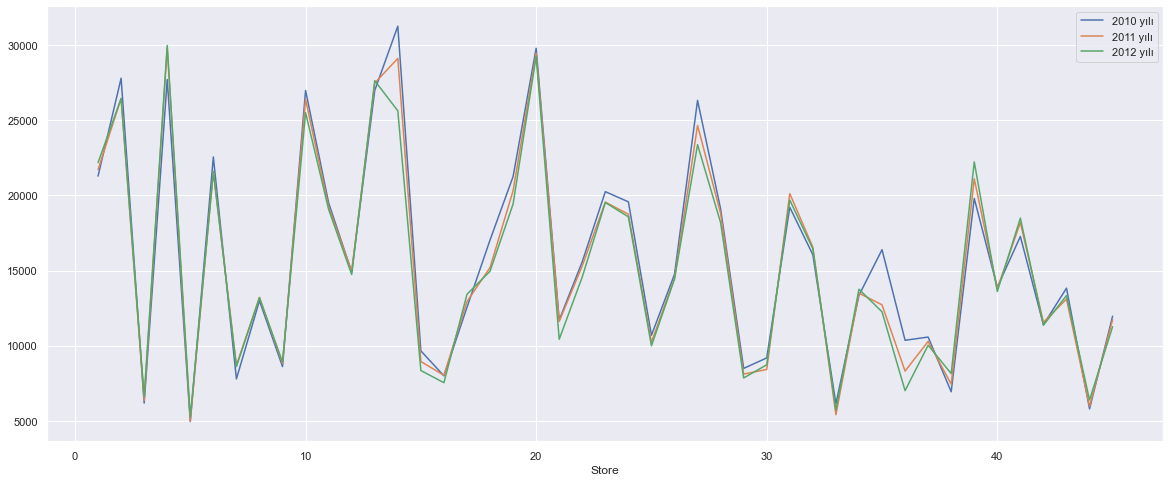

In [40]:
sns.set()
fig, ax = plt.subplots(figsize = (20,8))
for i in store_sales_year:
  sns.lineplot(x=store_sales_year[i].index, y=store_sales_year[i].values, label="{} yılı".format(i))


### Her departman için yıl bazında satış verileri

In [41]:
dept_ort = dict()
for i in dataset["Year"].unique():
  dept_ort[i] = (dataset[dataset.Year == i].groupby("Dept")["Weekly_Sales"].mean())

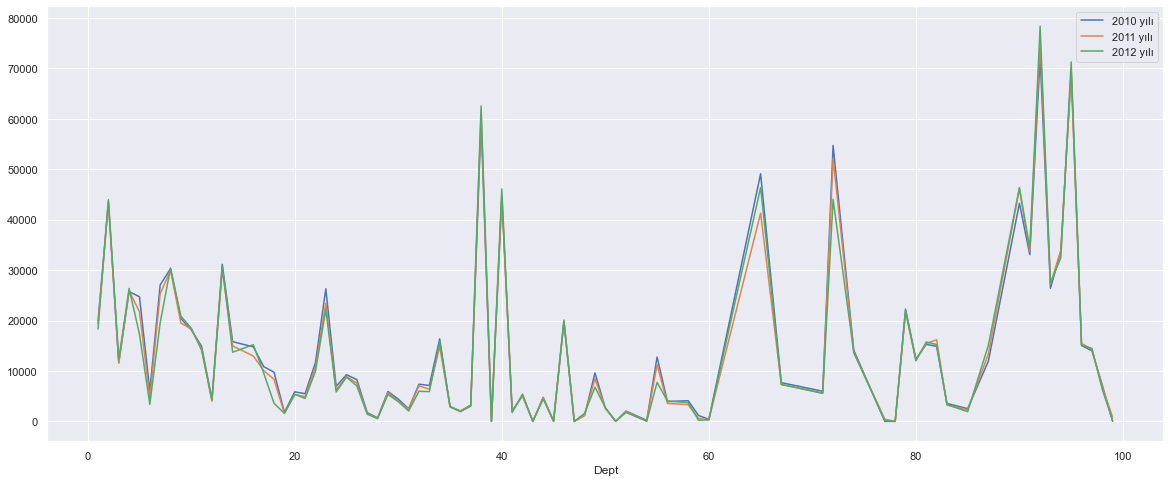

In [42]:
sns.set()
fig, ax = plt.subplots(figsize = (20,8))
for i in dept_ort:
  sns.lineplot(x=dept_ort[i].index, y=dept_ort[i].values, label="{} yılı".format(i))


### Zaman serilerini ayrıştırma

In [43]:
#sm.tsa.seasonal_decompose(data['Weekly_Sales'].resample('MS').mean(), model='additive').plot()
res = sm.tsa.seasonal_decompose(data['Weekly_Sales'].resample('MS').mean(),  model='additive')


In [44]:
#şşs

In [45]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot


C:\Users\Busra\AppData\Local\Temp/ipykernel_10004/3215927311.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


Text(0.5, 1.0, 'Residual')

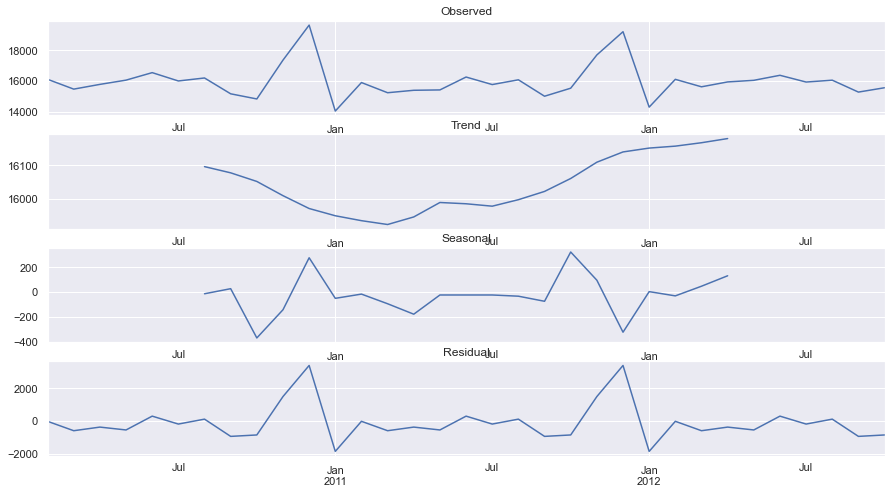

In [46]:
import matplotlib.pyplot as plt 

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(15,8))

res.observed.plot(ax=ax1)
res.trend.plot(ax=ax2)
res.resid.plot(ax=ax3)
res.seasonal.plot(ax=ax4)

ax1.set_title('Observed')
ax2.set_title('Trend')
ax3.set_title('Seasonal')
ax4.set_title('Residual')


# Korelasyon

[]

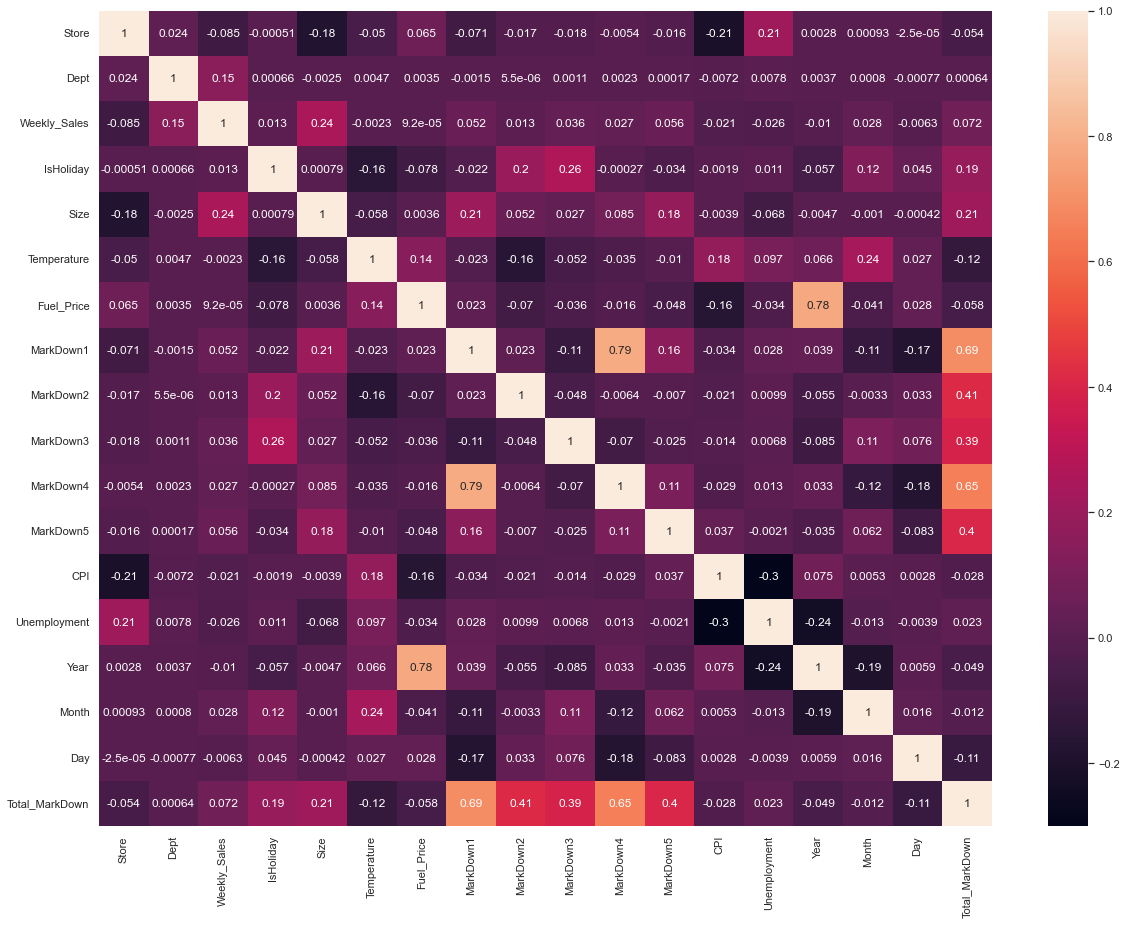

In [47]:
corr = data.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True)
plt.plot()

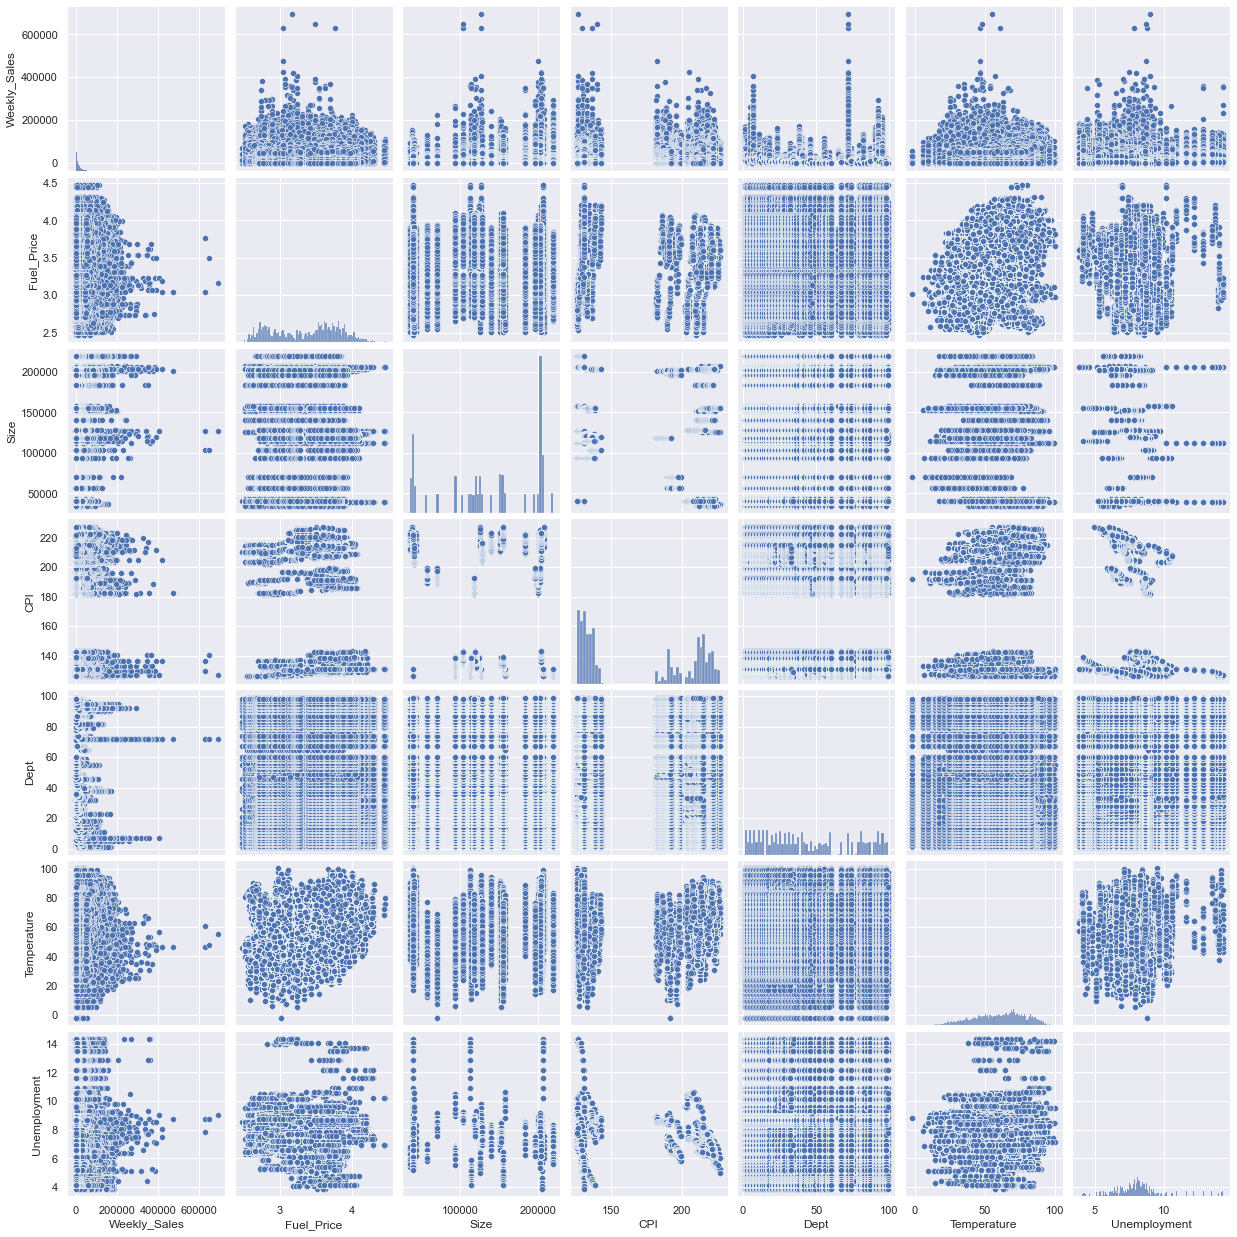

In [48]:
sns.pairplot(dataset, vars=['Weekly_Sales', 'Fuel_Price', 'Size', 'CPI', 'Dept', 'Temperature', 'Unemployment'])

# One-hot-encoding


In [49]:
data = dummies(data,"Type")
#data = dummies(data,"Store")
#data = dummies(data,"Dept")

In [50]:
data.shape

(420285, 21)

In [51]:
data.head()

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,Year,Month,Day,Total_MarkDown,Type_A,Type_B,Type_C
2010-02-05,1,1,24924.50,0,151315,42.31,2.572,7246.420196,3334.628621,1439.421384,...,4628.975079,211.096358,8.106,2010,2,5,20032.613536,1,0,0
2010-02-12,1,1,46039.49,1,151315,38.51,2.548,7246.420196,3334.628621,1439.421384,...,4628.975079,211.242170,8.106,2010,2,12,20032.613536,1,0,0
2010-02-19,1,1,41595.55,0,151315,39.93,2.514,7246.420196,3334.628621,1439.421384,...,4628.975079,211.289143,8.106,2010,2,19,20032.613536,1,0,0
2010-02-26,1,1,19403.54,0,151315,46.63,2.561,7246.420196,3334.628621,1439.421384,...,4628.975079,211.319643,8.106,2010,2,26,20032.613536,1,0,0
2010-03-05,1,1,21827.90,0,151315,46.50,2.625,7246.420196,3334.628621,1439.421384,...,4628.975079,211.350143,8.106,2010,3,5,20032.613536,1,0,0


# Test ve Train verilerini ayırma

In [52]:
#Test ve train olarak veri setlerimizi ikiye ayırıyoruz.
test_dataset = data[data.index>="2011-10"]
train_dataset = data[data.index<"2011-10"]


In [53]:
test_dataset.head()

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,Year,Month,Day,Total_MarkDown,Type_A,Type_B,Type_C
2011-10-07,1,1,20797.58,0,151315,69.31,3.285,7246.420196,3334.628621,1439.421384,...,4628.975079,217.045368,7.866,2011,10,7,20032.613536,1,0,0
2011-10-14,1,1,23077.55,0,151315,71.74,3.274,7246.420196,3334.628621,1439.421384,...,4628.975079,217.355273,7.866,2011,10,14,20032.613536,1,0,0
2011-10-21,1,1,23351.80,0,151315,63.71,3.353,7246.420196,3334.628621,1439.421384,...,4628.975079,217.515976,7.866,2011,10,21,20032.613536,1,0,0
2011-10-28,1,1,31579.90,0,151315,66.57,3.372,7246.420196,3334.628621,1439.421384,...,4628.975079,217.676679,7.866,2011,10,28,20032.613536,1,0,0
2011-11-04,1,1,39886.06,0,151315,54.98,3.332,7246.420196,3334.628621,1439.421384,...,4628.975079,217.837382,7.866,2011,11,4,20032.613536,1,0,0


In [54]:
test_dataset.tail()

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,Year,Month,Day,Total_MarkDown,Type_A,Type_B,Type_C
2012-09-28,45,98,508.37,0,118221,64.88,3.997,4556.61,20.640000,1.50,...,3288.25,192.013558,8.684,2012,9,28,9468.010000,0,1,0
2012-10-05,45,98,628.10,0,118221,64.89,3.985,5046.74,3334.628621,18.82,...,2340.01,192.170412,8.667,2012,10,5,12993.628621,0,1,0
2012-10-12,45,98,1061.02,0,118221,54.47,4.000,1956.28,3334.628621,7.89,...,3990.54,192.327265,8.667,2012,10,12,9888.658621,0,1,0
2012-10-19,45,98,760.01,0,118221,56.47,3.969,2004.02,3334.628621,3.18,...,1537.49,192.330854,8.667,2012,10,19,7317.048621,0,1,0
2012-10-26,45,98,1076.80,0,118221,58.85,3.882,4018.91,58.080000,100.00,...,858.33,192.308899,8.667,2012,10,26,5247.260000,0,1,0


In [55]:
train_dataset.head()

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,Year,Month,Day,Total_MarkDown,Type_A,Type_B,Type_C
2010-02-05,1,1,24924.50,0,151315,42.31,2.572,7246.420196,3334.628621,1439.421384,...,4628.975079,211.096358,8.106,2010,2,5,20032.613536,1,0,0
2010-02-12,1,1,46039.49,1,151315,38.51,2.548,7246.420196,3334.628621,1439.421384,...,4628.975079,211.242170,8.106,2010,2,12,20032.613536,1,0,0
2010-02-19,1,1,41595.55,0,151315,39.93,2.514,7246.420196,3334.628621,1439.421384,...,4628.975079,211.289143,8.106,2010,2,19,20032.613536,1,0,0
2010-02-26,1,1,19403.54,0,151315,46.63,2.561,7246.420196,3334.628621,1439.421384,...,4628.975079,211.319643,8.106,2010,2,26,20032.613536,1,0,0
2010-03-05,1,1,21827.90,0,151315,46.50,2.625,7246.420196,3334.628621,1439.421384,...,4628.975079,211.350143,8.106,2010,3,5,20032.613536,1,0,0


In [56]:
train_dataset.tail()

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,Year,Month,Day,Total_MarkDown,Type_A,Type_B,Type_C
2011-09-02,45,98,601.42,0,118221,70.63,3.703,7246.420196,3334.628621,1439.421384,...,4628.975079,186.618927,8.625,2011,9,2,20032.613536,0,1,0
2011-09-09,45,98,1092.66,1,118221,71.48,3.738,7246.420196,3334.628621,1439.421384,...,4628.975079,186.673738,8.625,2011,9,9,20032.613536,0,1,0
2011-09-16,45,98,791.96,0,118221,69.17,3.742,7246.420196,3334.628621,1439.421384,...,4628.975079,186.802400,8.625,2011,9,16,20032.613536,0,1,0
2011-09-23,45,98,655.12,0,118221,63.75,3.711,7246.420196,3334.628621,1439.421384,...,4628.975079,187.029532,8.625,2011,9,23,20032.613536,0,1,0
2011-09-30,45,98,727.05,0,118221,70.66,3.645,7246.420196,3334.628621,1439.421384,...,4628.975079,187.256664,8.625,2011,9,30,20032.613536,0,1,0


In [57]:
train_dataset.index

DatetimeIndex(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
               '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
               '2010-04-02', '2010-04-09',
               ...
               '2011-07-29', '2011-08-05', '2011-08-12', '2011-08-19',
               '2011-08-26', '2011-09-02', '2011-09-09', '2011-09-16',
               '2011-09-23', '2011-09-30'],
              dtype='datetime64[ns]', length=254595, freq=None)

In [58]:
test_dataset.index

DatetimeIndex(['2011-10-07', '2011-10-14', '2011-10-21', '2011-10-28',
               '2011-11-04', '2011-11-11', '2011-11-18', '2011-11-25',
               '2011-12-02', '2011-12-09',
               ...
               '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-10-05', '2012-10-12',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', length=165690, freq=None)

In [59]:
y_test  = test_dataset["Weekly_Sales"]
y_train = train_dataset["Weekly_Sales"]

X_test  = test_dataset.drop(columns=["Weekly_Sales"])
X_train = train_dataset.drop(columns=["Weekly_Sales"])

In [60]:
y_test.values

array([20797.58, 23077.55, 23351.8 , ...,  1061.02,   760.01,  1076.8 ])

In [61]:
y_train.values

array([24924.5 , 46039.49, 41595.55, ...,   791.96,   655.12,   727.05])

In [62]:
X_test.columns

Index(['Store', 'Dept', 'IsHoliday', 'Size', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Year', 'Month', 'Day', 'Total_MarkDown', 'Type_A',
       'Type_B', 'Type_C'],
      dtype='object')

In [63]:
X_train.columns

Index(['Store', 'Dept', 'IsHoliday', 'Size', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Year', 'Month', 'Day', 'Total_MarkDown', 'Type_A',
       'Type_B', 'Type_C'],
      dtype='object')

# Eğitimler

In [64]:
X_train

,Store,Dept,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,Total_MarkDown,Type_A,Type_B,Type_C
2010-02-05,1,1,0,151315,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,2010,2,5,20032.613536,1,0,0
2010-02-12,1,1,1,151315,38.51,2.548,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.242170,8.106,2010,2,12,20032.613536,1,0,0
2010-02-19,1,1,0,151315,39.93,2.514,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.289143,8.106,2010,2,19,20032.613536,1,0,0
2010-02-26,1,1,0,151315,46.63,2.561,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.319643,8.106,2010,2,26,20032.613536,1,0,0
2010-03-05,1,1,0,151315,46.50,2.625,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.350143,8.106,2010,3,5,20032.613536,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-09-02,45,98,0,118221,70.63,3.703,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,186.618927,8.625,2011,9,2,20032.613536,0,1,0
2011-09-09,45,98,1,118221,71.48,3.738,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,186.673738,8.625,2011,9,9,20032.613536,0,1,0
2011-09-16,45,98,0,118221,69.17,3.742,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,186.802400,8.625,2011,9,16,20032.613536,0,1,0
2011-09-23,45,98,0,118221,63.75,3.711,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,187.029532,8.625,2011,9,23,20032.613536,0,1,0


# Random Forest

In [65]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100, random_state = 0,)
rf = rf.fit(X_train, y_train)


In [66]:
from sklearn.inspection import permutation_importance
rf.feature_importances_


array([4.74246723e-02, 6.29184999e-01, 2.74556873e-03, 1.87074729e-01,
       1.25751654e-02, 6.69688615e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.35256812e-02,
       1.72783663e-02, 2.09695227e-04, 2.81225730e-02, 2.04112791e-02,
       0.00000000e+00, 3.35370619e-03, 1.10398730e-02, 3.56805172e-04])

<BarContainer object of 20 artists>

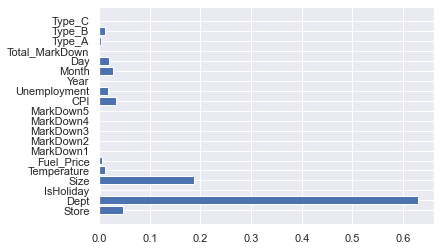

In [67]:
plt.barh(X_train.columns, rf.feature_importances_)


In [68]:
rf_acc = rf.score(X_test,y_test)*100
print("Random Forest Regressor Accuracy - ",rf_acc)

Random Forest Regressor Accuracy -  93.65551049582368


In [69]:
y_pred = rf.predict(X_test)


In [70]:
errors(y_test,y_pred)
r2(y_test,y_pred)

mae: 2586.374545122216 
mse: 34030329.99934248 
rmse: 5833.552091079883


0.9365551049582368

In [71]:
y_pred

array([28645.4709, 27419.2897, 24813.2814, ...,   794.2905,   743.5033,
         717.9246])

<AxesSubplot:>

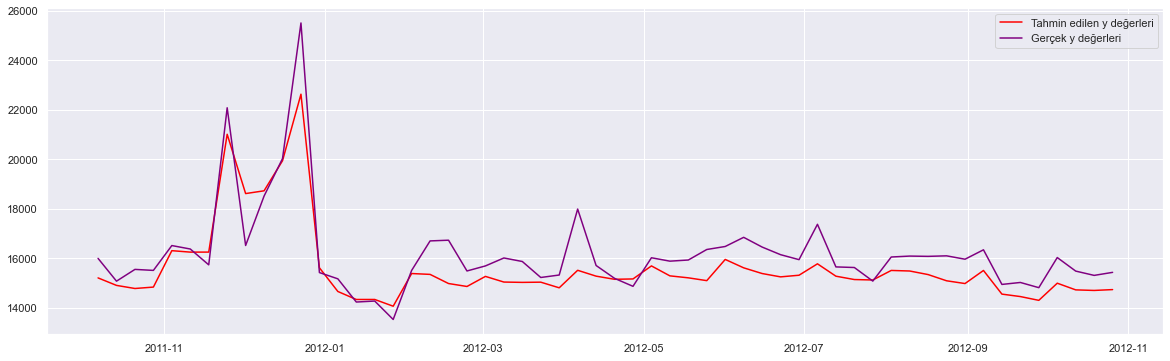

In [72]:
sns.set()
y, ax = plt.subplots(figsize=(20,6))
sns.lineplot(x=X_test.index, y=y_pred, ci = None, color = "red", label = "Tahmin edilen y değerleri")
sns.lineplot(x=X_test.index, y=y_test.values, ci = None, color = "purple", label =  "Gerçek y değerleri")


<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

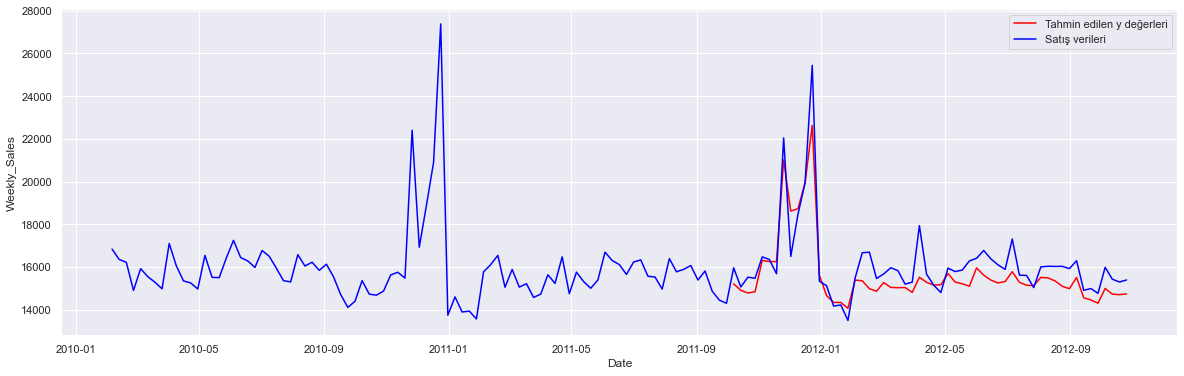

In [73]:
sns.set()
y, ax = plt.subplots(figsize=(20,6))
sns.lineplot(x=X_test.index, y=y_pred, ci = None, color = "red", label = "Tahmin edilen y değerleri")
sns.lineplot(x=dataset["Date"], y=train_df["Weekly_Sales"], ci= None, color="blue", label = "Satış verileri")


In [74]:
rand_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rand_df

,Actual,Predicted
2011-10-07,20797.58,28645.4709
2011-10-14,23077.55,27419.2897
2011-10-21,23351.80,24813.2814
2011-10-28,31579.90,40033.3514
2011-11-04,39886.06,24712.9274
...,...,...
2012-09-28,508.37,767.8936
2012-10-05,628.10,793.9445
2012-10-12,1061.02,794.2905
2012-10-19,760.01,743.5033


# XGBoost 

In [75]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [76]:
xgbr.feature_importances_


array([0.0641629 , 0.24848783, 0.04153789, 0.22001156, 0.01051724,
       0.00446563, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.04080651, 0.01853636, 0.00354059, 0.04336602,
       0.02553563, 0.        , 0.02135994, 0.24119899, 0.01647292],
      dtype=float32)

<BarContainer object of 20 artists>

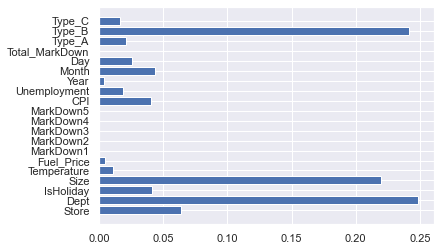

In [77]:
plt.barh(X_train.columns, xgbr.feature_importances_)


In [78]:
xgb_acc = xgbr.score(X_test,y_test)*100
print("XGBoost Regressor Accuracy - ",xgb_acc)

XGBoost Regressor Accuracy -  91.195829293965


In [79]:
y_pred = xgbr.predict(X_test)


In [80]:
errors(y_test,y_pred)
r2(y_test,y_pred)

mae: 3822.5095252203464 
mse: 47223473.89804881 
rmse: 6871.933781552963


0.91195829293965

In [81]:
xgb_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
xgb_df

,Actual,Predicted
2011-10-07,20797.58,21956.099609
2011-10-14,23077.55,22483.970703
2011-10-21,23351.80,24779.171875
2011-10-28,31579.90,30787.966797
2011-11-04,39886.06,24830.755859
...,...,...
2012-09-28,508.37,2041.255737
2012-10-05,628.10,1524.091064
2012-10-12,1061.02,3022.373535
2012-10-19,760.01,517.989502


<AxesSubplot:>

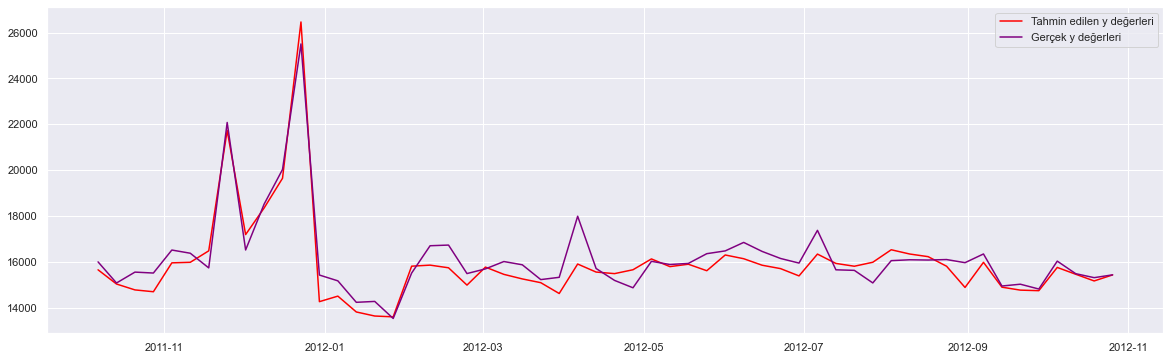

In [82]:
sns.set()
y, ax = plt.subplots(figsize=(20,6))
sns.lineplot(x=X_test.index, y=y_pred, ci = None, color = "red", label = "Tahmin edilen y değerleri")
sns.lineplot(x=X_test.index, y=y_test.values, ci = None, color = "purple", label =  "Gerçek y değerleri")


<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

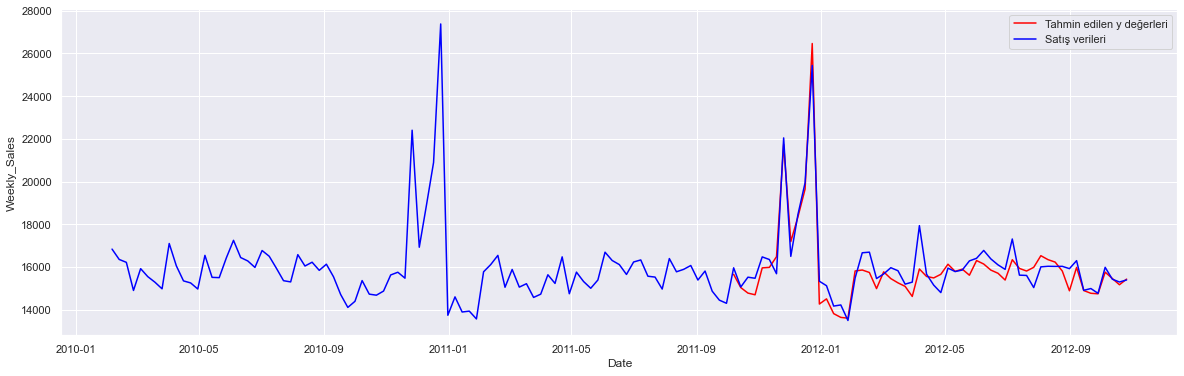

In [83]:
sns.set()
y, ax = plt.subplots(figsize=(20,6))
sns.lineplot(x=X_test.index, y=y_pred, ci = None, color = "red", label = "Tahmin edilen y değerleri")
sns.lineplot(x=dataset["Date"], y=train_df["Weekly_Sales"], ci= None, color="blue", label = "Satış verileri")


# K neighbours

In [84]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 1,weights = 'uniform')
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [85]:
knn_acc = knn.score(X_test, y_test)*100
print("KNeigbhbors Regressor Accuracy - ",knn_acc)

KNeigbhbors Regressor Accuracy -  89.70779653260783


In [86]:
y_pred = knn.predict(X_test)


In [87]:
errors(y_test,y_pred)
r2(y_test,y_pred)

mae: 2749.5934186734266 
mse: 55204927.076509334 
rmse: 7430.00182210673


0.8970779653260783

In [88]:
kn_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
kn_df

,Actual,Predicted
2011-10-07,20797.58,23873.79
2011-10-14,23077.55,28762.37
2011-10-21,23351.80,15136.78
2011-10-28,31579.90,38640.93
2011-11-04,39886.06,34238.88
...,...,...
2012-09-28,508.37,655.12
2012-10-05,628.10,601.42
2012-10-12,1061.02,980.06
2012-10-19,760.01,655.12


<AxesSubplot:>

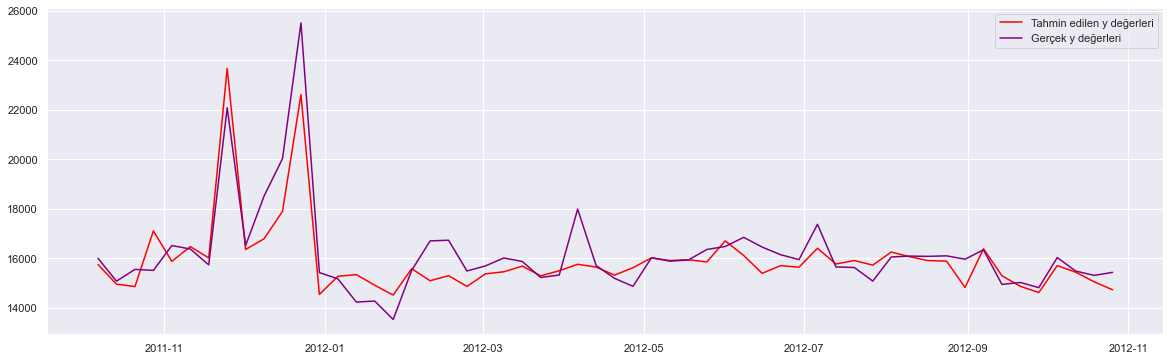

In [89]:
sns.set()
y, ax = plt.subplots(figsize=(20,6))
sns.lineplot(x=X_test.index, y=y_pred, ci = None, color = "red", label = "Tahmin edilen y değerleri")
sns.lineplot(x=X_test.index, y=y_test.values, ci = None, color = "purple", label =  "Gerçek y değerleri")


<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

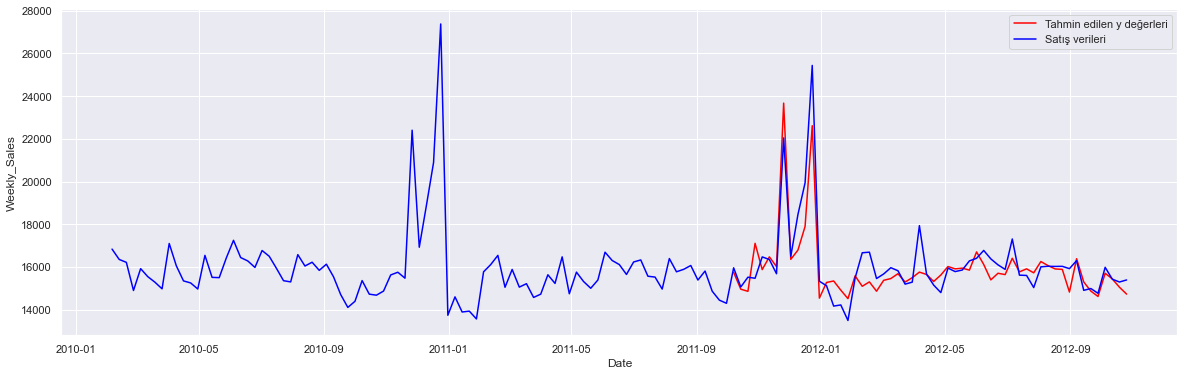

In [90]:
sns.set()
y, ax = plt.subplots(figsize=(20,6))
sns.lineplot(x=X_test.index, y=y_pred, ci = None, color = "red", label = "Tahmin edilen y değerleri")
sns.lineplot(x=dataset["Date"], y=train_df["Weekly_Sales"], ci= None, color="blue", label = "Satış verileri")


# Karşılaştırma

In [91]:
acc = {'model':['random forest','k - neighbours','xgboost'],'Doğruluk yüzdesi':[rf_acc,knn_acc,xgb_acc]}


In [92]:
acc_df = pd.DataFrame(acc)
acc_df

,model,Doğruluk yüzdesi
0,random forest,93.655510
1,k - neighbours,89.707797
2,xgboost,91.195829


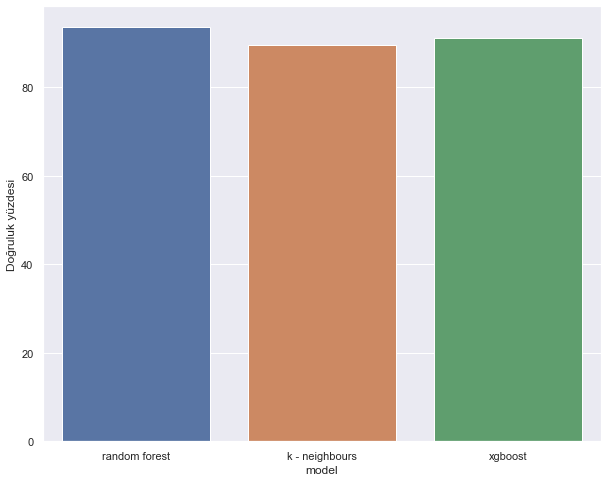

In [93]:
plt.figure(figsize=(10,8))
sns.barplot(x='model',y='Doğruluk yüzdesi',data=acc_df)
plt.show()